In [1]:
# 매직명령어
%matplotlib inline
# 필요한 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 로딩 : read_csv(파일명, sep, encoding='utf-8') #한글일 때
cctv = pd.read_csv('D:/python3/data/CCTV_in_Seoul.csv', encoding='utf-8')

In [5]:
# 데이터 확인 : head(), tail()
cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
# 컬럼명
cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [9]:
# 피처(컬럼)명 변경
# 컬럼명 변경 : rename()
# cctv.columns[0]
# inplace = True : 변경 내용을 원본에 바로 경신하기 위한 옵션
cctv.rename(columns ={cctv.columns[0]:'구별'}, inplace = True)
#                    cctv.columns[0] 찾아서 '구별'로 바꾼다.
cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [11]:
# 서울시 인구 현황 데이터 로딩
pop = pd.read_excel('D:/python3/data/population_in_Seoul.xls', encoding='utf-8')
pop.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [12]:
pop = pd.read_excel('D:/python3/data/population_in_Seoul.xls', 
                    header = 2, usecols = 'B, D, G, J, N',
                    encoding='utf-8') # usecols -> 필요한 열만 가져오기
                                      # header =2 : 두번째 행을 머리글로 쓴다.
pop.head() 

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [14]:
# 컬럼명 변경
pop.rename(columns={pop.columns[0]:'구별',
                   pop.columns[1]:'인구수',
                   pop.columns[2]:'한국인',
                   pop.columns[3]:'외국인',
                   pop.columns[4]:'고령자'}, inplace = True)
pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [ ]:
# 인구 수 많으면 cctv가 많지 않을까?
# cctv가 많으면 범죄가 적지 않을까? 
# cctv가 증가된 이유 확인 등

In [16]:
# 파생변수 : 최근증가율
# 2013년도 이전에 데이터와 최근 3년간(14, 15, 16년) 증가율을 계산
cctv['최근증가율'] = (cctv['2014년']+cctv['2015년']+cctv['2016년']) / cctv['2013년도 이전']*100
cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [18]:
# 최근증가율을 기준으로 내림차순
cctv.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [19]:
# cctv가 설치된 대수(소계)를 기준으로 내림차순 정렬
cctv.sort_values(by = '소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
18,양천구,2034,1843,142,30,467,34.671731
14,서초구,1930,1406,157,336,398,63.371266
21,은평구,1873,1138,224,278,468,85.237258
20,용산구,1624,1368,218,112,398,53.216374


In [21]:
# pop 데이터셋의 첫행을 제거하는 작업
pop.drop([0], inplace=True) # 합계 제거
pop.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [22]:
# unique() : 중복값을 제거하고 고유값을 확인하는 함수
pop['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [23]:
# 결측치 제거 : [], isnull()
pop[pop['구별'].isnull()] # 결측치 확인

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [25]:
# 결측치 제거
pop.drop([26], inplace= True)
pop

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [26]:
# 파생변수 : 외국인비율과 고령자비율
pop['외국인비율'] = pop['외국인']/pop['인구수']*100
pop['고령자비율'] = pop['고령자']/pop['인구수']*100
pop

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [27]:
# 인구수를 기준으로 내림차순 정렬
pop.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [28]:
# 외국인 수를 기준으로 내림차순
pop.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [29]:
# 외국인 비율을 기준으로 내림차순
pop.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [30]:
# 고령자 인구수를 기준으로 내림차순
pop.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [31]:
# 고령자 비율 기준으로 내림차순
pop.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [33]:
# 두 개의 데이터프레임을 합치는 작업
df = pd.merge(cctv, pop, on = '구별') # 합칠 때 매개채 -> '구별'
df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [34]:
# cctv가 설치된 대수의 합: '소계'와 상관관계가 있는 피처를 찾아내는 작업
np.corrcoef(df['고령자비율'], df['소계'])
# -1 ~ 1까지 되어있음 1 일 수록 강한 상관관계, 
# -1일 수록 음의 상관관계


array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [35]:
np.corrcoef(df['외국인비율'], df['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [36]:
np.corrcoef(df['인구수'], df['소계'])
# 양의 상관관계 -> 인구수 높을수록 cctv가 많다.

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [37]:
# 인구수를 기준으로 내림차순 정렬
df.sort_values(by='인구수', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,송파구,618,529,21,68,463,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [39]:
# 분석에 불필요하다고 판단되는 피처(컬럼) 제거하는 작업
del df['2013년도 이전']
del df['2014년']
del df['2015년']
del df['2016년']
df.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [41]:
# '구별' 컬럼을 index로 설정하는 작업
df.set_index('구별', inplace = True) #이미 있는 인덱스로 바꿈
df.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [43]:
# os별로 한글처리하는 작업
import platform
from matplotlib import font_manager, rc # parameter 값

if platform.system() == 'Darwin': # apple꺼 (맥캔토시)
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system....')

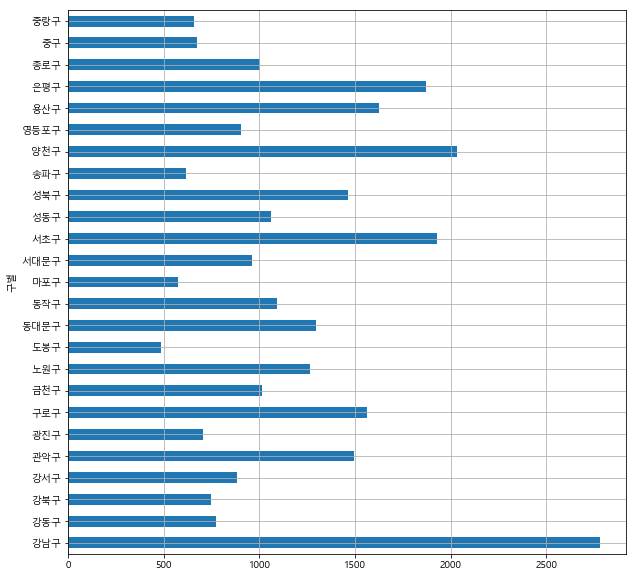

In [45]:
df['소계'].plot(kind = 'barh', grid = True, figsize= (10,10))
plt.show()

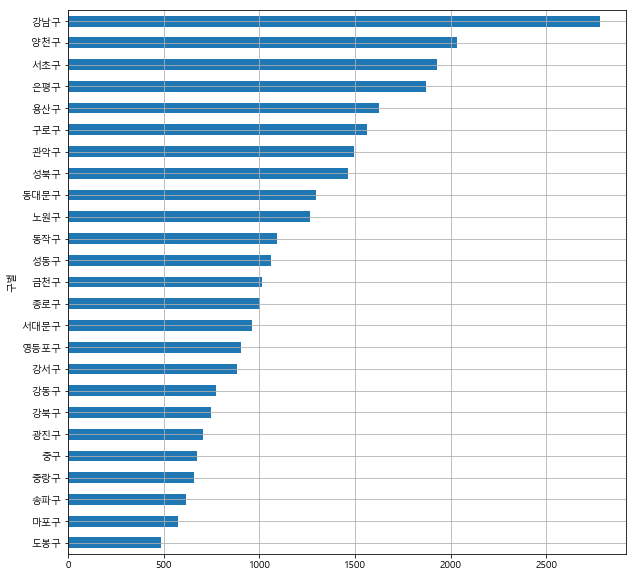

In [46]:
df['소계'].sort_values().plot(kind = 'barh', grid = True, figsize= (10,10))
plt.show()

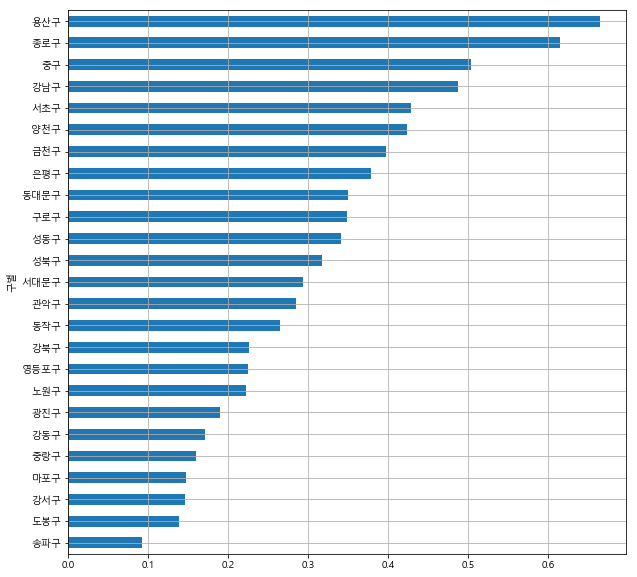

In [48]:
# 인구대비 cctv 비율
df['cctv비율'] = df['소계'] / df['인구수'] * 100
df['cctv비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

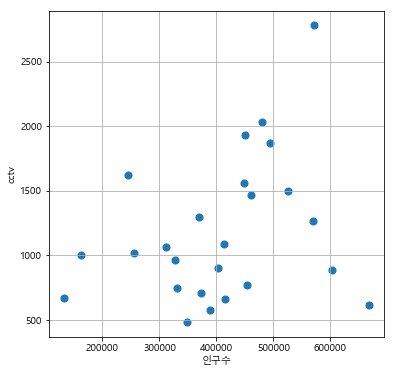

In [49]:
plt.figure(figsize=(6, 6))
plt.scatter(df['인구수'], df['소계'], s=50)# s 는 점의 사이즈
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [50]:
# cctv 인구수가 양의 상관관계를 가지고 있다는 것을 확인하여 산점도 그래프
#에 상관관계를 이용하는 선을 추가하는 작업
fp1 = np.polyfit(df['인구수'], df['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [53]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

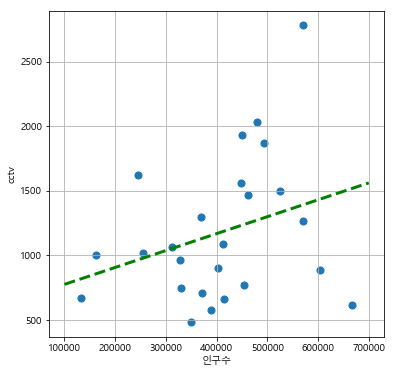

In [55]:
plt.figure(figsize=(6, 6))
plt.scatter(df['인구수'], df['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color = 'g') # ls -> linestyle
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [56]:
# 오차를 계산한 후 오차를 기준으로 정렬, 구별 이름 추출
fp1 = np.polyfit(df['인구수'], df['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

df['오차'] = np.abs(df['소계'] - f1(df['인구수']))

df_sort = df.sort_values(by= '오차', ascending= False)
df_sort.head()
                  

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


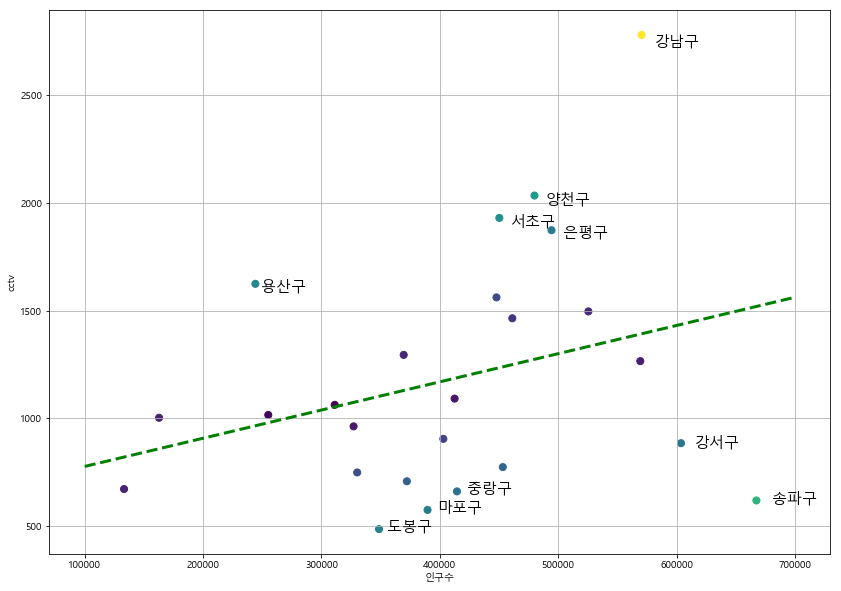

In [57]:
plt.figure(figsize=(14, 10))
plt.scatter(df['인구수'], df['소계'], c= df['오차'], s=50) # c -> color
plt.plot(fx, f1(fx), ls='dashed', lw=3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, 
             df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15) #글자가 써지는 위치
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [59]:
# csv 파일로 저장하는  작업
df.to_csv('D:/python3/data/CCTV_Result.csv')